In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (9)/hmnist_28_28_RGB.csv')
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

In [ ]:
tabular_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (9)/HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

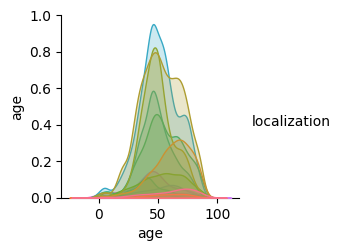

In [ ]:
import seaborn as sns
sns.pairplot(tabular_data ,hue="localization")

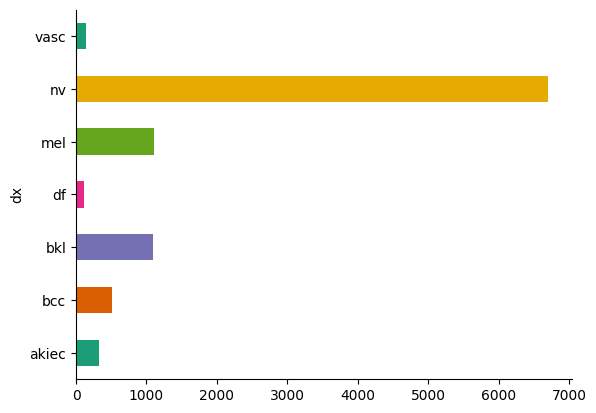

In [ ]:
# @title dx

from matplotlib import pyplot as plt
import seaborn as sns
tabular_data.groupby('dx').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

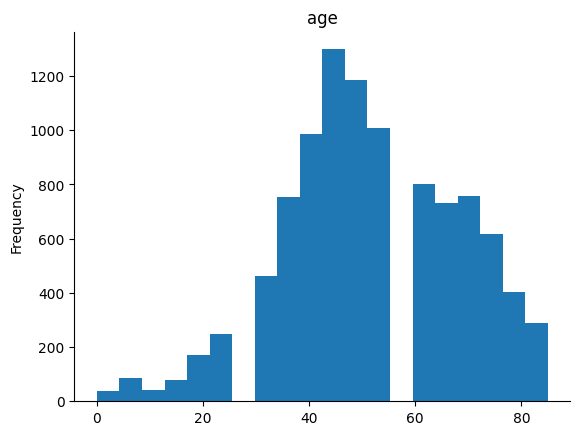

In [ ]:
# @title age

from matplotlib import pyplot as plt
tabular_data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

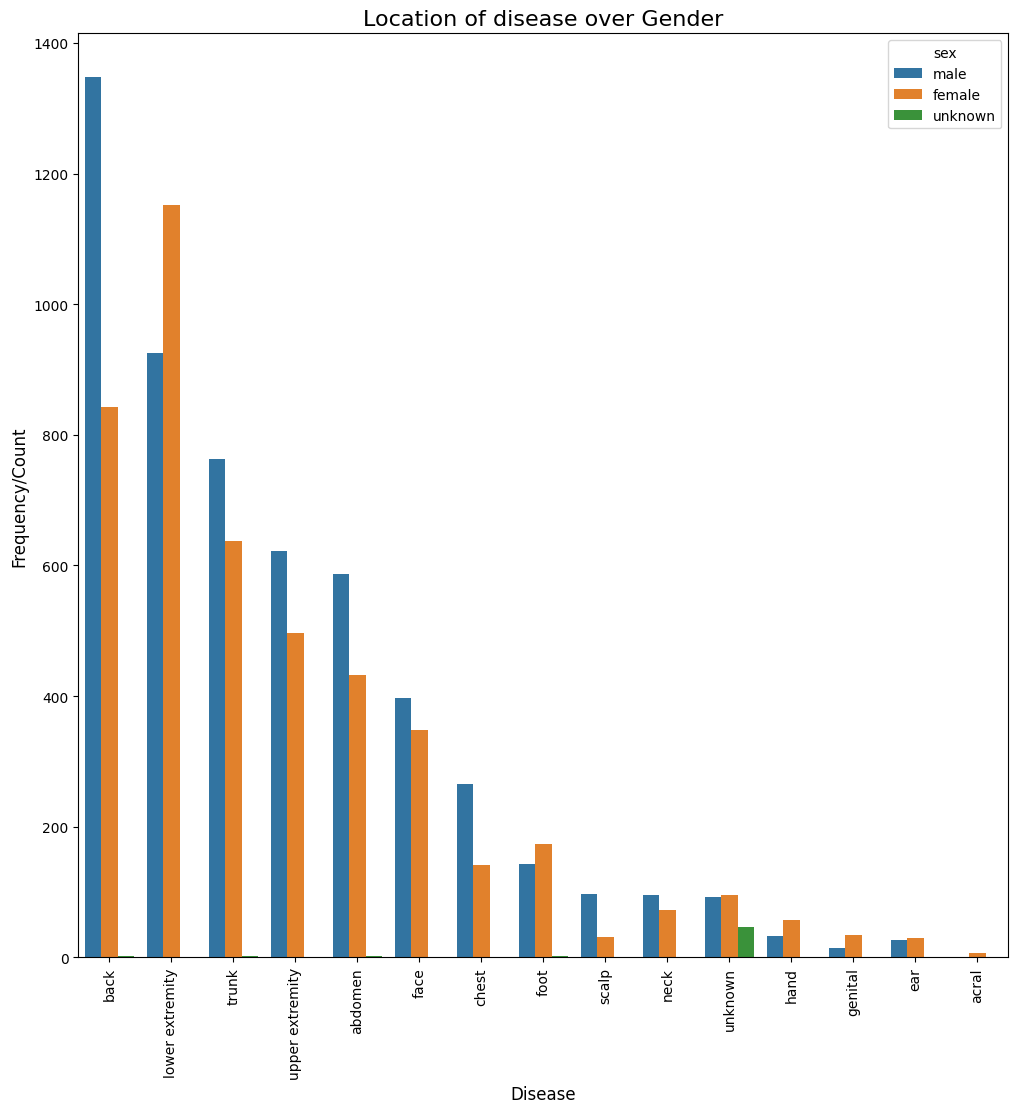

In [ ]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder

data_analysis = tabular_data
le = LabelEncoder()
for col in data_analysis.columns:
    data_analysis[col] = le.fit_transform(data_analysis[col])
corr=data_analysis.corr()
corr

lesion_id  image_id        dx   dx_type       age       sex  \
lesion_id      1.000000  0.021310  0.000694 -0.009786  0.000349 -0.018939   
image_id       0.021310  1.000000  0.010832  0.101686 -0.001445  0.018796   
dx             0.000694  0.010832  1.000000 -0.238336 -0.418433 -0.073130   
dx_type       -0.009786  0.101686 -0.238336  1.000000  0.116262  0.025853   
age            0.000349 -0.001445 -0.418433  0.116262  1.000000  0.192259   
sex           -0.018939  0.018796 -0.073130  0.025853  0.192259  1.000000   
localization   0.001599 -0.012520  0.042260 -0.105914 -0.001499 -0.039845   

              localization  
lesion_id         0.001599  
image_id         -0.012520  
dx                0.042260  
dx_type          -0.105914  
age              -0.001499  
sex              -0.039845  
localization      1.000000

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to balance the dataset
x, y = smote.fit_resample(x, y)


In [ ]:
x = np.array(x).reshape(-1, 28, 28, 3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [ ]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.20, random_state=123)

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                                  monitor='val_acc', mode='max',
                                                 verbose=2)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.30,
                    batch_size = 127,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.3801 - loss: 1.5431
Epoch 1: saving model to best_model.keras
207/207 ━━━━━━━━━━━━━━━━━━━━ 82s 375ms/step - accuracy: 0.3806 - loss: 1.5419 - val_accuracy: 0.6522 - val_loss: 0.9604
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.6727 - loss: 0.8705
Epoch 2: saving model to best_model.keras
207/207 ━━━━━━━━━━━━━━━━━━━━ 62s 280ms/step - accuracy: 0.6728 - loss: 0.8701 - val_accuracy: 0.7469 - val_loss: 0.6933
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.7732 - loss: 0.6125
Epoch 3: saving model to best_model.keras
207/207 ━━━━━━━━━━━━━━━━━━━━ 88s 311ms/step - accuracy: 0.7733 - loss: 0.6123 - val_accuracy: 0.8144 - val_loss: 0.4956
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8466 - loss: 0.4306
Epoch 4: saving model to best_model.keras
207/207 ━━━━━━━━━━━━━━━━━━━━ 69s 336ms/step - accuracy: 0.8466 - loss: 0.4305 - val_accuracy: 0.8665 - val_loss: 0.3807


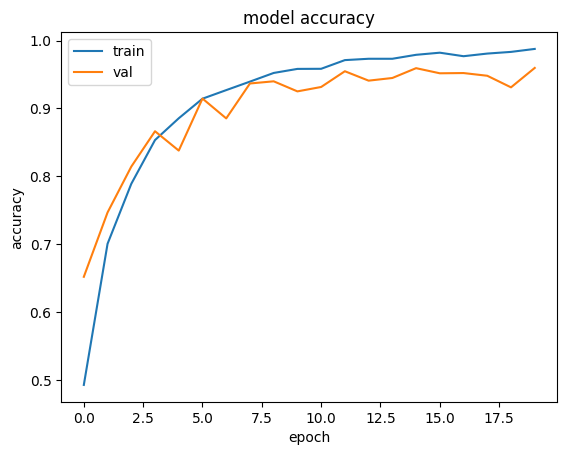

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

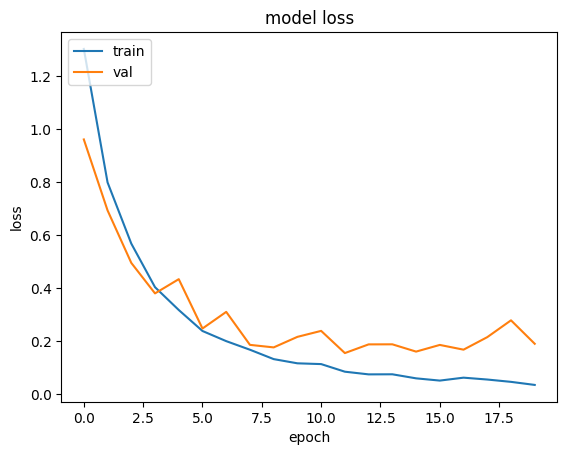

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
y_pred = [np.argmax(probas) for probas in predictions]


accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy = %.2f' % accuracy)

294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
Test Accuracy = 0.96


In [ ]:
model.load_weights('best_model.keras')

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 10s - 32ms/step - accuracy: 0.9609 - loss: 0.1907


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Load the best model and evaluate on the test set
model.load_weights('best_model.keras')
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(Y_test, predicted_classes)
precision = precision_score(Y_test, predicted_classes, average='macro')
recall = recall_score(Y_test, predicted_classes, average='macro')
f1 = f1_score(Y_test, predicted_classes, average='macro')
classification_rep = classification_report(Y_test, predicted_classes)
conf_matrix = confusion_matrix(Y_test, predicted_classes)

print(f'Test accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)

294/294 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step
Test accuracy: 0.9609
Precision: 0.9621
Recall: 0.9605
F1 Score: 0.9598
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1287
           1       0.99      1.00      0.99      1360
           2       0.91      0.97      0.94      1369
           3       1.00      1.00      1.00      1371
           4       0.96      0.79      0.86      1315
           5       1.00      1.00      1.00      1328
           6       0.90      0.96      0.93      1357

    accuracy                           0.96      9387
   macro avg       0.96      0.96      0.96      9387
weighted avg       0.96      0.96      0.96      9387

Confusion Matrix:
[[1287    0    0    0    0    0    0]
 [   0 1359    0    1    0    0    0]
 [   1    0 1333    0   15    0   20]
 [   0    0    0 1371    0    0    0]
 [  15   16  124    3 1035    3  119]
 [   0    0    0    0    0 1328    0]
 [   2    0   15    

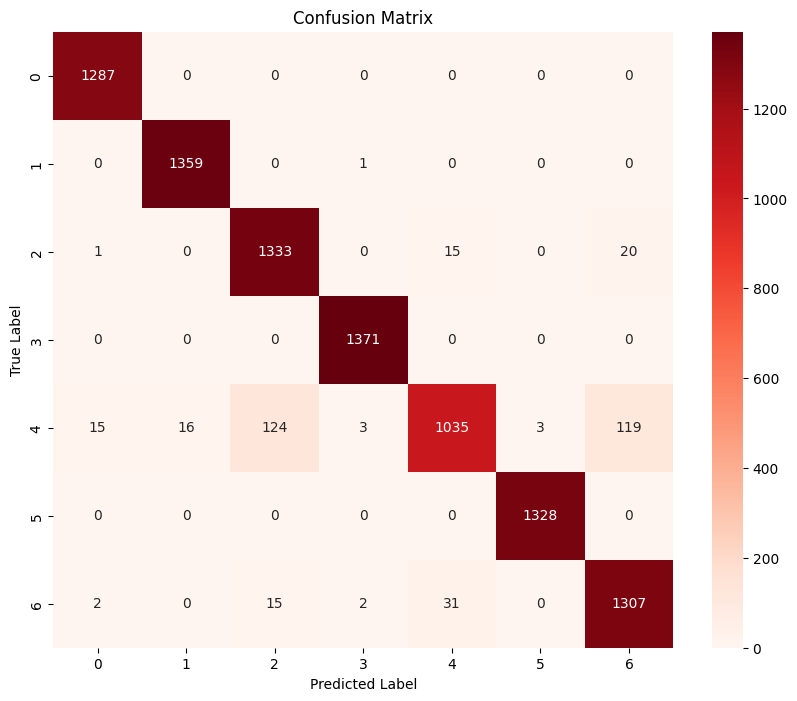

In [ ]:
import matplotlib.pyplot as plt
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.0 MB/s eta 0:00:00


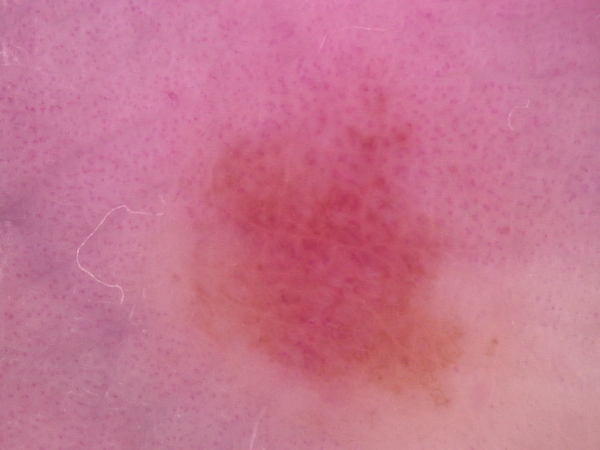

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
('df', 'dermatofibroma')


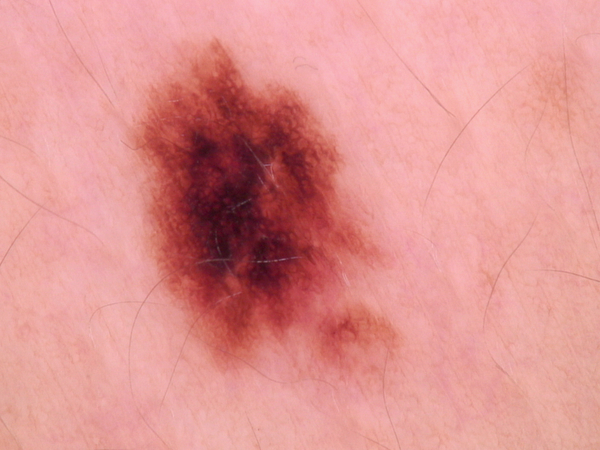

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
('nv', ' melanocytic nevi')


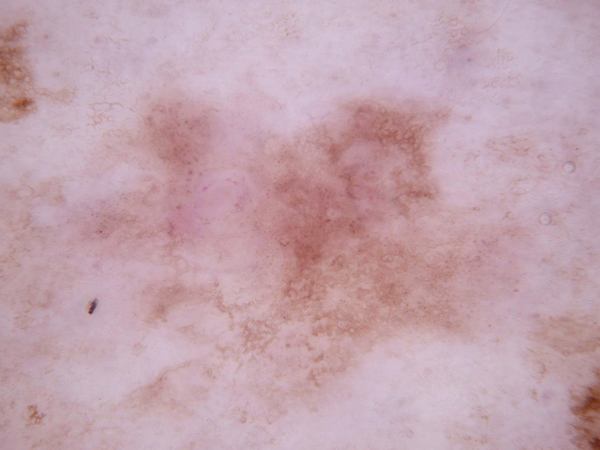

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
('df', 'dermatofibroma')


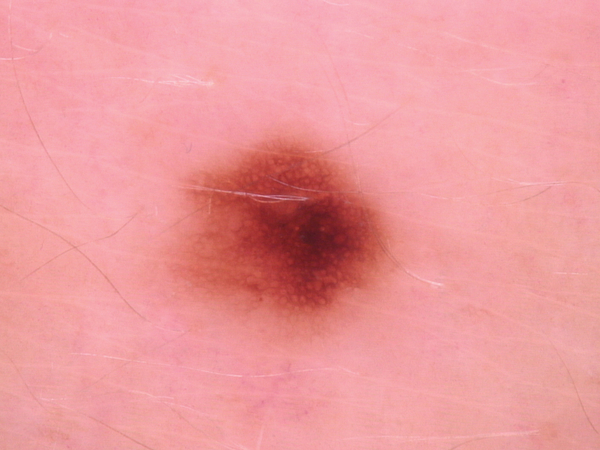

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
('df', 'dermatofibroma')


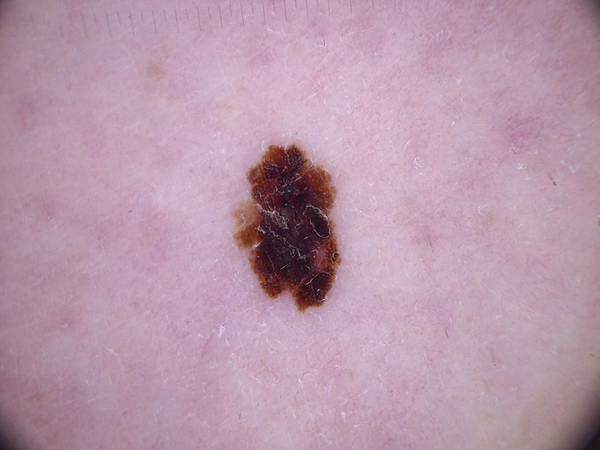

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
('nv', ' melanocytic nevi')


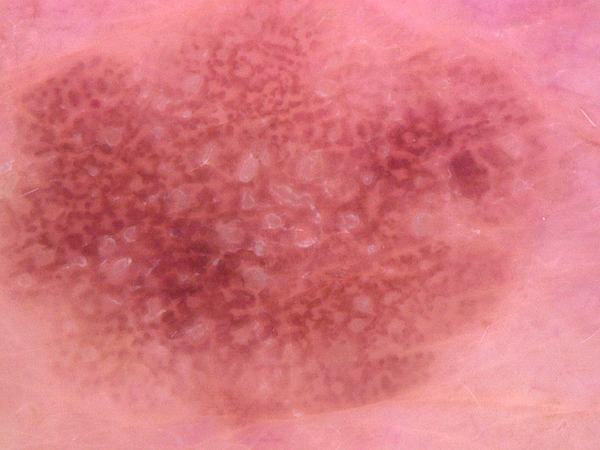

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
('nv', ' melanocytic nevi')


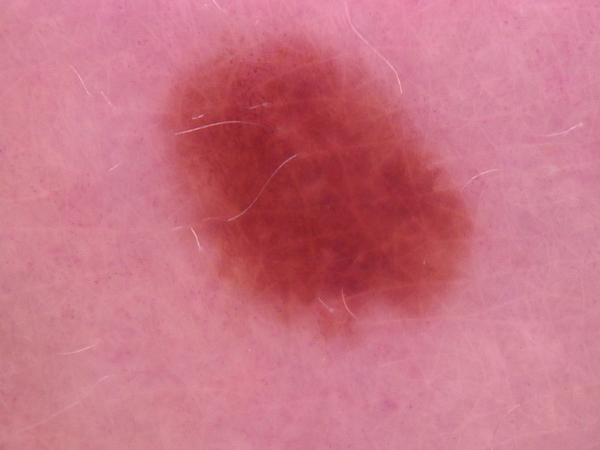

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
('df', 'dermatofibroma')


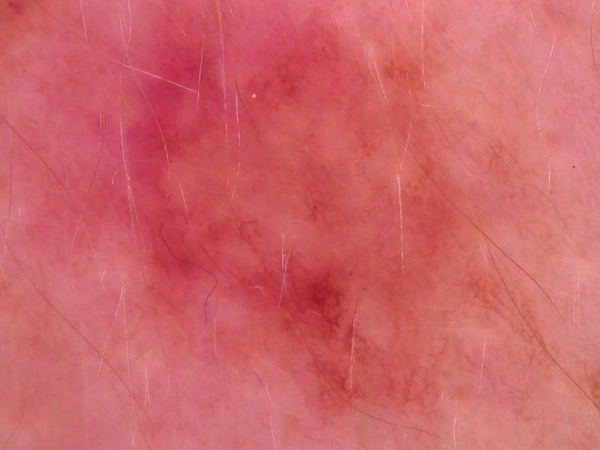

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
('nv', ' melanocytic nevi')


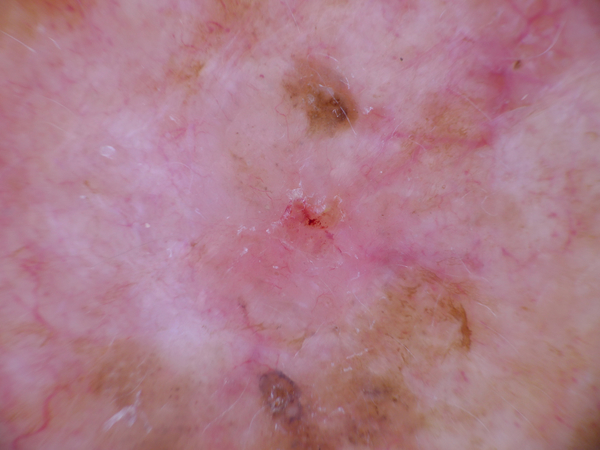

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
('df', 'dermatofibroma')


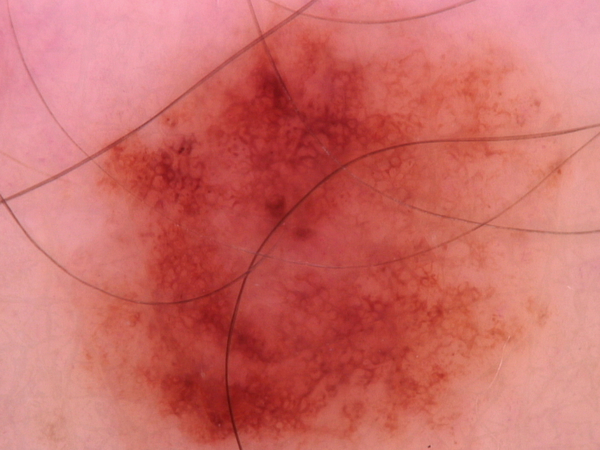

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
('nv', ' melanocytic nevi')


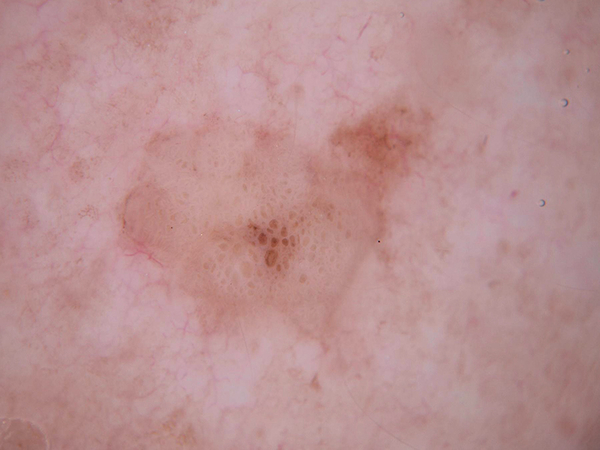

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
('df', 'dermatofibroma')


In [ ]:
!pip install google.colab
from google.colab.patches import cv2_imshow
srcdir = '/content/drive/MyDrive/Colab Notebooks/archive (9)/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1,28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=dd3cc7dbea2098c740848dc25aaabd47e9f23bb9240dab038876e68bbdc16542
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1

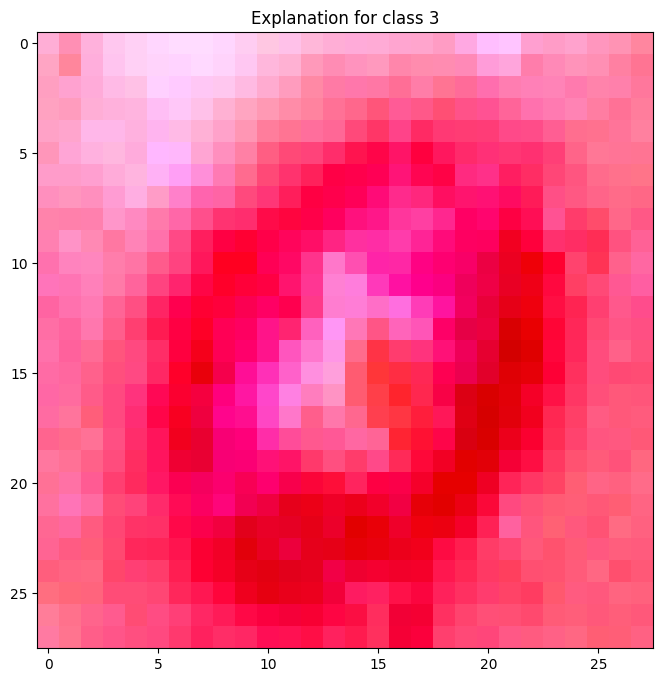

In [ ]:
!pip install lime

from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt

def predict_fn(images):
    images = np.array([img for img in images])
    return model.predict(images)

explainer = lime_image.LimeImageExplainer()

# Select an image from the test set
i = 0  # Index of the image in X_test to explain
image = X_test[i]

# Explain the prediction
explanation = explainer.explain_instance(image, predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Choose the label to explain (e.g., the predicted label)
label = np.argmax(model.predict(image.reshape(1, 28, 28, 3)))

# Get the image and mask for the explanation
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=10, hide_rest=False)

# Plot the explanation
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title(f'Explanation for class {label}')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input


In [ ]:

from tensorflow.keras import layers, models

def create_retnet(input_shape=(28, 28, 3), num_classes=7):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), strides=2, padding='same')(inputs)  # 28x28 → 14x14
    x = layers.Reshape((196, 64))(x)  # 14*14 = 196, channels = 64

    x = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

retnet_model = create_retnet()
retnet_model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 196, 64)   │          0 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     33,216 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ multi_head_atten… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      4,160 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 7)         │        231 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 41,479 (162.03 KB)

 Trainable params: 41,479 (162.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

retnet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

retnet_history = retnet_model.fit(X_train, Y_train,
                                  validation_split=0.3,
                                  batch_size=127,
                                  epochs=20)


Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.2927 - loss: 1.7308 - val_accuracy: 0.4857 - val_loss: 1.3169
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 205s 990ms/step - accuracy: 0.5241 - loss: 1.2463 - val_accuracy: 0.5716 - val_loss: 1.1400
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 257s 966ms/step - accuracy: 0.5616 - loss: 1.1397 - val_accuracy: 0.5799 - val_loss: 1.0762
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 205s 983ms/step - accuracy: 0.6028 - loss: 1.0482 - val_accuracy: 0.5885 - val_loss: 1.0495
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 247s 910ms/step - accuracy: 0.6176 - loss: 1.0004 - val_accuracy: 0.6258 - val_loss: 0.9491
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 216s 980ms/step - accuracy: 0.6459 - loss: 0.9356 - val_accuracy: 0.6582 - val_loss: 0.8887
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 260s 972ms/step - accuracy: 0.6661 - loss: 0.8782 - val_accuracy: 0.6913 - val_loss: 0.8437
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 185s 891ms/step - accuracy: 0.6935 - lo

In [ ]:
from tensorflow.keras import Input

cnn_input = Input(shape=(28, 28, 3))
cnn_output = model(cnn_input)
cnn_model_fn = models.Model(inputs=cnn_input, outputs=cnn_output)


In [ ]:
def create_ensemble(cnn_model_fn, retnet_model, input_shape=(28, 28, 3)):
    cnn_input = Input(shape=input_shape)
    ret_input = Input(shape=input_shape)

    cnn_out = cnn_model_fn(cnn_input)
    ret_out = retnet_model(ret_input)

    merged = layers.Average()([cnn_out, ret_out])
    model = models.Model(inputs=[cnn_input, ret_input], outputs=merged)
    return model

ensemble_model = create_ensemble(cnn_model_fn, retnet_model)
ensemble_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ensemble_model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 28, 28, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_11       │ (None, 7)         │    182,663 │ input_layer_3[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_10       │ (None, 7)         │     41,479 │ input_layer_4[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average (Average)   │ (None, 7)         │          0 │ functional_11[0]… │
│                     │                   │            │ functional_10[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 224,142 (875.55 KB)

 Trainable params: 224,142 (875.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ensemble_history = ensemble_model.fit([X_train, X_train], Y_train,
                                      validation_split=0.3,
                                      batch_size=127,
                                      epochs=10)


Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.9792 - loss: 0.1899 - val_accuracy: 0.9438 - val_loss: 0.2627
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.9722 - loss: 0.1891 - val_accuracy: 0.9429 - val_loss: 0.2756
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.9764 - loss: 0.1682 - val_accuracy: 0.9450 - val_loss: 0.2725
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.9751 - loss: 0.1646 - val_accuracy: 0.9625 - val_loss: 0.2246
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9851 - loss: 0.1384 - val_accuracy: 0.9504 - val_loss: 0.2644
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.9734 - loss: 0.1612 - val_accuracy: 0.9265 - val_loss: 0.2848
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.9651 - loss: 0.1793 - val_accuracy: 0.9536 - val_loss: 0.2266
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.9757 - loss: 0.1493 - val_accu

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# CNN
cnn_preds = model.predict(X_test)
cnn_pred_classes = np.argmax(cnn_preds, axis=1)

# RetNet
ret_preds = retnet_model.predict(X_test)
ret_pred_classes = np.argmax(ret_preds, axis=1)

# Ensemble
ens_preds = ensemble_model.predict([X_test, X_test])
ens_pred_classes = np.argmax(ens_preds, axis=1)

# Metrics
cnn_acc = accuracy_score(Y_test, cnn_pred_classes)
cnn_prec = precision_score(Y_test, cnn_pred_classes, average='macro')
cnn_rec = recall_score(Y_test, cnn_pred_classes, average='macro')
cnn_f1 = f1_score(Y_test, cnn_pred_classes, average='macro')

ret_acc = accuracy_score(Y_test, ret_pred_classes)
ret_prec = precision_score(Y_test, ret_pred_classes, average='macro')
ret_rec = recall_score(Y_test, ret_pred_classes, average='macro')
ret_f1 = f1_score(Y_test, ret_pred_classes, average='macro')

ens_acc = accuracy_score(Y_test, ens_pred_classes)
ens_prec = precision_score(Y_test, ens_pred_classes, average='macro')
ens_rec = recall_score(Y_test, ens_pred_classes, average='macro')
ens_f1 = f1_score(Y_test, ens_pred_classes, average='macro')

print(f"CNN      - Accuracy: {cnn_acc:.4f}, Precision: {cnn_prec:.4f}, Recall: {cnn_rec:.4f}, F1 Score: {cnn_f1:.4f}")
print(f"RetNet   - Accuracy: {ret_acc:.4f}, Precision: {ret_prec:.4f}, Recall: {ret_rec:.4f}, F1 Score: {ret_f1:.4f}")
print(f"Ensemble - Accuracy: {ens_acc:.4f}, Precision: {ens_prec:.4f}, Recall: {ens_rec:.4f}, F1 Score: {ens_f1:.4f}")


294/294 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step
CNN      - Accuracy: 0.9607, Precision: 0.9625, Recall: 0.9603, F1 Score: 0.9601
RetNet   - Accuracy: 0.7999, Precision: 0.8010, Recall: 0.8000, F1 Score: 0.7987
Ensemble - Accuracy: 0.9563, Precision: 0.9578, Recall: 0.9559, F1 Score: 0.9552


In [ ]:
cnn_acc = model.evaluate(X_test, Y_test, verbose=0)[1]
ret_acc = retnet_model.evaluate(X_test, Y_test, verbose=0)[1]
ens_acc = ensemble_model.evaluate([X_test, X_test], Y_test, verbose=0)[1]

print(f"CNN accuracy: {cnn_acc:.4f}")
print(f"RetNet-inspired accuracy: {ret_acc:.4f}")
print(f"Ensemble accuracy: {ens_acc:.4f}")


CNN accuracy: 0.9607
RetNet-inspired accuracy: 0.7999
Ensemble accuracy: 0.9563


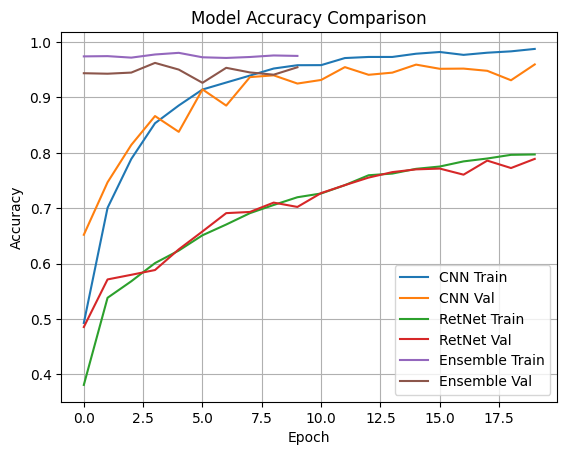

In [ ]:

import matplotlib.pyplot as plt

# CNN
plt.plot(history.history['accuracy'], label='CNN Train')
plt.plot(history.history['val_accuracy'], label='CNN Val')
# RetNet
plt.plot(retnet_history.history['accuracy'], label='RetNet Train')
plt.plot(retnet_history.history['val_accuracy'], label='RetNet Val')
# Ensemble
plt.plot(ensemble_history.history['accuracy'], label='Ensemble Train')
plt.plot(ensemble_history.history['val_accuracy'], label='Ensemble Val')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/Colab Notebooks/skin_cancer_clean.ipynb" "main_pipeline.ipynb"


!rm -rf .git
!git init
!git config --global user.name "Anika Hossain"
!git config --global user.email "anikahossain517@gmail.com"
!git branch -M main

!git add main_pipeline.ipynb
!git commit -m "Upload final notebook from Google Drive"

!git push -f origin main


Mounted at /content/drive
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
[main (root-commit) 5d689ea] Upload final notebook from Google Drive
 1 file changed, 1 insertion(+)
 create mode 100644 main_pipeline.ipynb
Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 2 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 5.02 MiB | 5.41 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
remote: error: GH013: Repository rule vio